In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone.csv',header=None,names=names,sep=';')

In [3]:
df.head()
#df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# We change the M,F and I categorical variables as numerical using 0,1 and 2.
replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
df.replace(replace_list,inplace=True)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
from sklearn.preprocessing import Normalizer

# Take Abalone dataset. Run some clustering method (except k-means) with different number of clusters.Which number of clusters is better?

In [7]:
# assigning input array
X = df.iloc[:,:9].values
scaler = Normalizer()
scaler.fit(X)
X_scaled = scaler.transform(X)

# AgglomerativeClustering

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import metrics
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
label_pred= agg.fit_predict(X_scaled)

Text(0,0.5,'Feature 1')

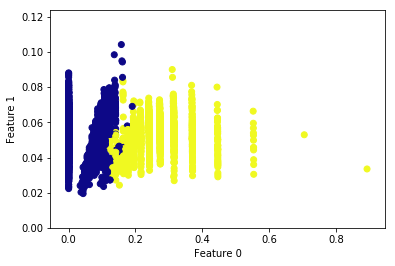

In [9]:
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [10]:
 # to measure accuracy using silhouette_score
print("silhouette_score for " ,2, ' clusters is :%.3f' %(silhouette_score(X_scaled,label_pred)))

silhouette_score for  2  clusters is :0.595


In [11]:
agg = AgglomerativeClustering(n_clusters=5)
label_pred= agg.fit_predict(X_scaled)
print("silhouette_score for " , 5,' clusters is :%.3f' %(silhouette_score(X_scaled,label_pred)))

silhouette_score for  5  clusters is :0.426


In [12]:
label_pred

array([1, 1, 2, ..., 4, 2, 4], dtype=int64)

Text(0,0.5,'Feature 1')

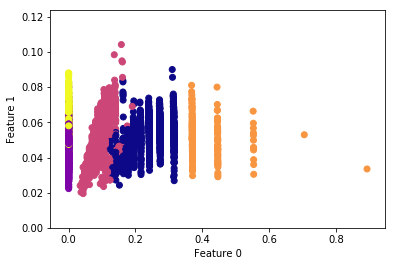

In [13]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [14]:
agg = AgglomerativeClustering(n_clusters=8)
label_pred= agg.fit_predict(X_scaled)
print("silhouette_score for " , 8, ' clusters is  :%.3f' %(silhouette_score(X_scaled,label_pred)))

silhouette_score for  8  clusters is  :0.391


Text(0,0.5,'Feature 1')

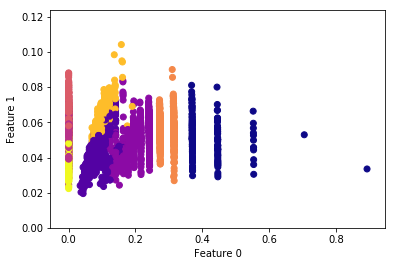

In [15]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### comment: When the cluster no 2 , it gives highest score. Therefore we can say that 2 no of cluster is better.

### 2.Take Abalone dataset. Reduce it’s dimensionality to 3 with Kernel PCA, then run clustering with 10 clusters.


In [16]:
 #standardising the input features before applying clustering method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_2 = scaler.transform(X)

In [17]:
from sklearn.decomposition import KernelPCA
# keep the first three principal components of the data
pca = KernelPCA(n_components=3, kernel='cosine',fit_inverse_transform=True)
# fit PCA model to abalone dataset
pca.fit(X_2)
# transform data onto the first three principal components
X_pca = pca.transform(X_2)
print("Original shape: {}".format(str(X_2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (4177, 9)
Reduced shape: (4177, 3)


In [18]:
#fitting by kmeans clustering method with 10 cluster
#finding the data point closest to the centroids of the clusters
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10).fit(X_pca)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_pca)
closest

array([ 201, 3717, 1030, 2571, 3725, 1871, 1938,  502, 2654,  279],
      dtype=int64)

In [19]:
 #x[3762] is the data point closest to the centroid of cluster 0
#the age of the data point closest to the centroid 0 is 2.5
X[3762]

array([2.    , 0.53  , 0.395 , 0.115 , 0.475 , 0.2025, 0.101 , 0.148 ,
       8.    ])

In [20]:
#cross checking with the df at the index location mentioned by 'closest' array
df.loc[3762]

Sex               2.0000
Length            0.5300
Diameter          0.3950
Height            0.1150
Whole weight      0.4750
Shucked weight    0.2025
Viscera weight    0.1010
Shell weight      0.1480
Rings             8.0000
Name: 3762, dtype: float64

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

In [22]:
#printing cluster labels
print("Cluster labels:", (kmeans.labels_))

Cluster labels: [3 4 1 ... 7 2 7]


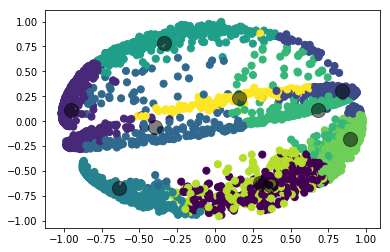

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [24]:
#finding the cluster centroids
print(" cluster centre:\n" , kmeans.cluster_centers_)

 cluster centre:
 [[ 0.36310871 -0.64116207 -0.37092246]
 [-0.94955458  0.11542121 -0.05854045]
 [ 0.84216924  0.30695136 -0.11489786]
 [-0.39952123 -0.05893289  0.70130976]
 [-0.63498303 -0.66778696 -0.08651183]
 [-0.33804094  0.78311355  0.01967604]
 [ 0.67975952  0.10873789  0.51837021]
 [ 0.88989376 -0.17428345 -0.14763778]
 [ 0.29987051 -0.6201347   0.49740472]
 [ 0.1600495   0.23528127 -0.60264786]]


In [25]:
centers.shape

(10, 3)

In [26]:
inverse1 = pca.inverse_transform(centers)
inverse1.shape

(10, 9)

In [27]:
inverse2 = scaler.inverse_transform(inverse1)
inverse2.shape

(10, 9)

In [28]:
X_centers = pd.DataFrame(data=inverse2, columns=df.columns)
X_centers

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.422904,0.548986,0.428268,0.143656,0.954499,0.439759,0.211568,0.253597,8.422920
1,1.691158,0.402896,0.306549,0.100518,0.318849,0.143087,0.068922,0.094924,7.417789
2,0.859473,0.656007,0.515974,0.178442,1.376525,0.609949,0.301016,0.383629,10.997535
3,1.255758,0.458178,0.358226,0.129907,0.545691,0.172602,0.113930,0.201564,14.205874
4,0.357028,0.408018,0.312932,0.103806,0.358517,0.155122,0.078847,0.105657,8.192000
5,2.445684,0.510283,0.394101,0.133233,0.751537,0.332365,0.162390,0.217172,8.879628
6,0.744784,0.629156,0.498321,0.179665,1.261249,0.504924,0.272073,0.386429,15.224471
7,0.109464,0.639541,0.503549,0.174178,1.319020,0.582611,0.289242,0.366984,11.076008
8,-0.173922,0.539589,0.426123,0.153528,0.903879,0.342938,0.194834,0.288280,14.536464
9,1.181806,0.568782,0.439082,0.141374,1.018037,0.510608,0.226544,0.247993,4.786361


In [29]:
#Age of cluster centroids is Rings+1.5
X_centers['Age'] = X_centers.Rings + 1.5

In [30]:
age_cluster_Centroids = X_centers.Age
age_cluster_Centroids

0     9.922920
1     8.917789
2    12.497535
3    15.705874
4     9.692000
5    10.379628
6    16.724471
7    12.576008
8    16.036464
9     6.286361
Name: Age, dtype: float64

# 3. Label propagation:

In [31]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

# cluster Abalone dataset without age (rings) feature using Gaussian Mixture Model

In [32]:
#abalone Dataset without ring
X_df = df.drop(['Rings'],axis=1)


In [33]:
#X_df.head()

In [34]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_df)
X_scaled = scaler.transform(X_df)

In [35]:
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=12)
gmm.fit(X_scaled)
labels=gmm.predict(X_scaled)


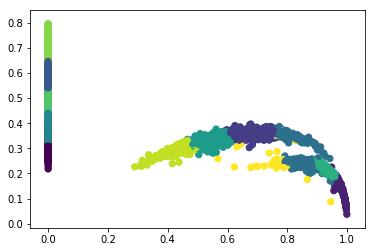

In [36]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=40, cmap='viridis')

In [37]:
#print(proba_lists[:5].round(3))

#### take randomly 20 samples with age from the original Abalone dataset, predict their probabilities with GaussianMM ("predict_proba")

In [38]:
# small abalone dataset with ring
X_small=df.sample(20)
rings= df['Rings'].sample(20)
X_small.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
367,1,0.580,0.455,0.120,1.0735,0.4790,0.2735,0.265,10
3288,1,0.605,0.475,0.145,1.0185,0.4695,0.2250,0.270,15
1254,2,0.425,0.325,0.110,0.3335,0.1730,0.0450,0.100,7
515,0,0.270,0.195,0.080,0.1000,0.0385,0.0195,0.030,6
2236,1,0.560,0.435,0.185,1.1060,0.4220,0.2435,0.330,15


In [39]:
scaler = Normalizer()
scaler.fit(X_small)
X1_scaled = scaler.transform(X_small)

In [40]:
gmm = GaussianMixture(n_components=12)
gmm.fit(X1_scaled)
labels=gmm.predict(X1_scaled)
cluster = gmm.predict_proba(X1_scaled)


In [41]:
print(cluster[:5].round(3))

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


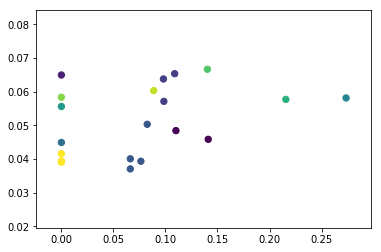

In [42]:
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=labels, s=40, cmap='viridis')

In [43]:
#Transform 'Rings' to multiple class
rings=pd.get_dummies(rings)
ring_values= np.array(rings.columns)

In [44]:
#rings.head()

In [45]:
#ring_values

In [46]:
#Get cluster x class matrix
cluster_age = cluster.T @ rings
# normalize so probabilities sum up to 1
cluster_age = cluster_age / cluster_age.sum(1)[:,None]
#cluster_age

In [47]:
#Get samples x class matrix
predicted_classes= gmm.predict_proba(X) @ cluster_age
#predicted_classes[:3]

In [48]:
#Predict rings by multiplying 'Rings' values of classes with class probabilities

predicted_age= predicted_classes @ ring_values

In [49]:
predicted_age.shape

(4177,)

In [50]:
predicted_age.round(3)

array([11. , 11. , 11. , ...,  9.5,  9.5,  9.5])